# Modelowanie ARMA

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

#from ts_utils import check_time_series_stationary
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
from statsmodels.tsa.stattools import adfuller
def check_time_series_stationary(y, rolling_len = 12):
    
    y = pd.Series(y)
    
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    pd.plotting.autocorrelation_plot(y)
    plt.show()

## Zadanie 1

Dokonaj analizy szeregu czasowego `USGDP`. Dopasuj odpowiedni model i dokonaj predykcji.

In [3]:
usgdp = pd.read_csv('USGDP.csv', 
                 parse_dates=['DATE'], index_col='DATE')

usgdp.head()

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     2.9819
p-value             :     1.0000
--------------------------------



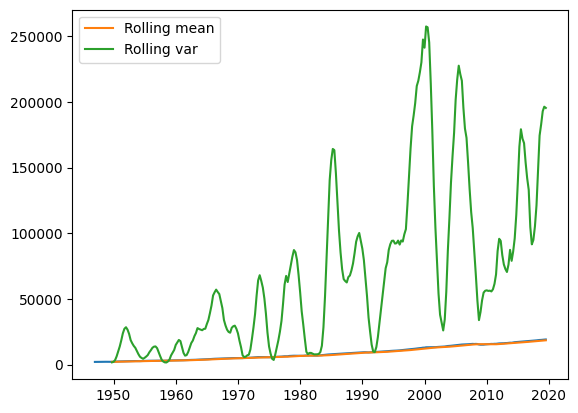

      Autocorrelation plot      
--------------------------------



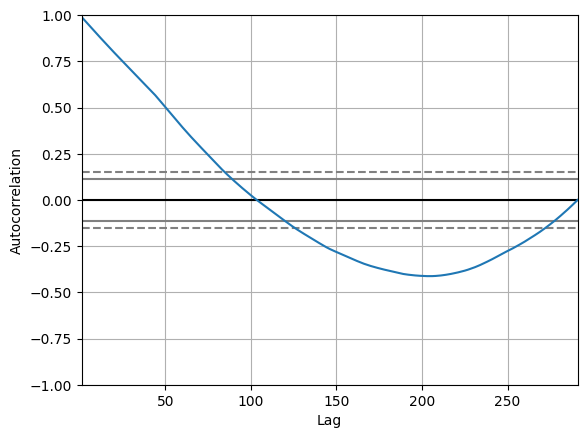

In [4]:
check_time_series_stationary(usgdp.GDPC1)

In [5]:
log_usgdp = np.log(usgdp)

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -2.1605
p-value             :     0.2209
--------------------------------



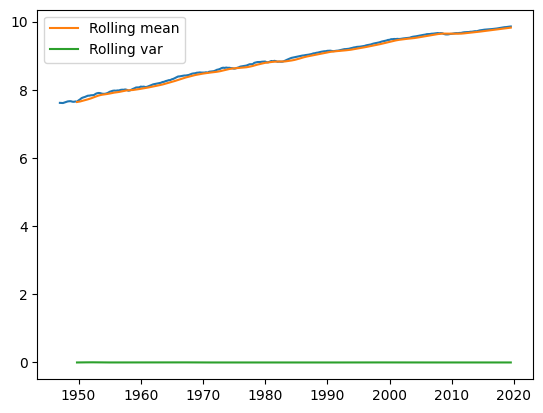

      Autocorrelation plot      
--------------------------------



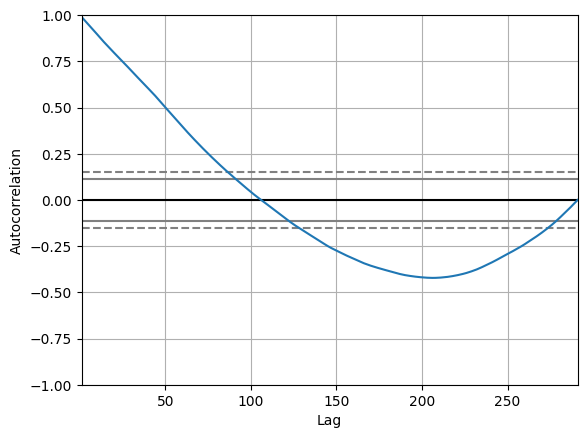

In [6]:
check_time_series_stationary(log_usgdp.GDPC1)

In [7]:
log_usgdp_diff = log_usgdp.diff(1).dropna()

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -8.4548
p-value             :     0.0000
--------------------------------



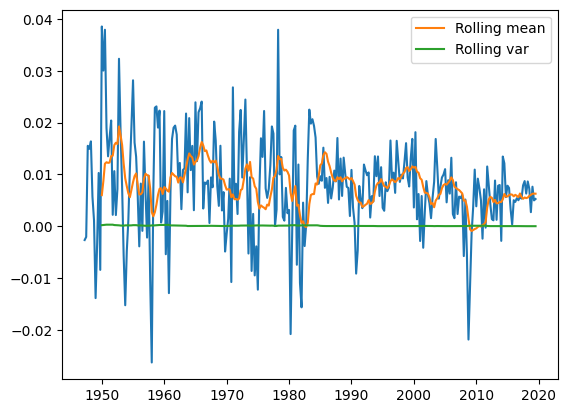

      Autocorrelation plot      
--------------------------------



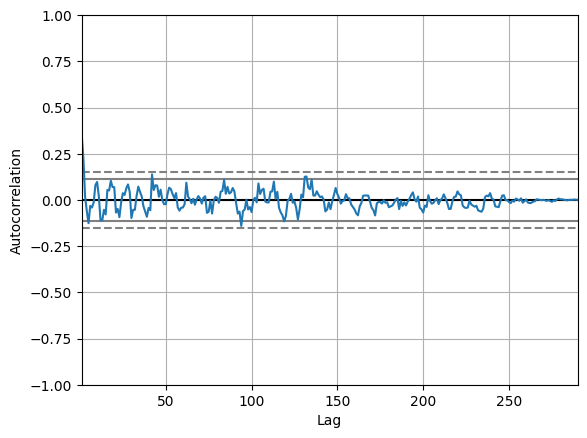

In [8]:
check_time_series_stationary(log_usgdp_diff.GDPC1) 

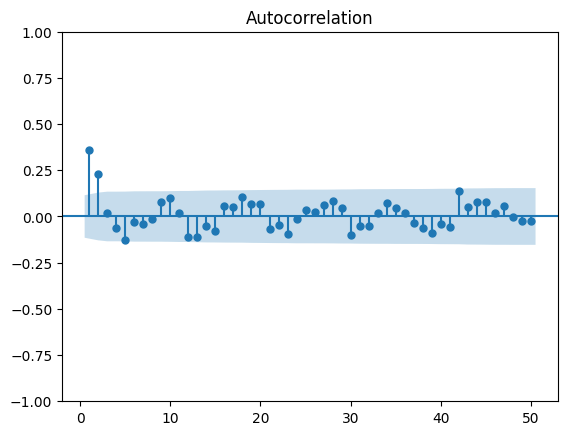

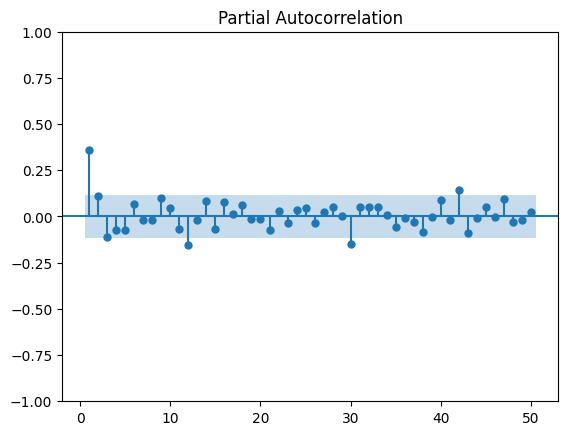

In [12]:
plot_acf(log_usgdp_diff.GDPC1, lags=50, zero=False)
plot_pacf(log_usgdp_diff.GDPC1, lags=50, zero=False)
plt.show()

In [20]:
arima = ARIMA(endog=log_usgdp, order=(3,1,2), trend='t')
arima = arima.fit()

C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [ ]:
# to jest model ktory dziala na log_usgdp

In [21]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  GDPC1   No. Observations:                  291
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 969.097
Date:                Sun, 15 Dec 2024   AIC                          -1924.194
Time:                        15:15:34   BIC                          -1898.505
Sample:                    01-01-1947   HQIC                         -1913.902
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0077      0.001     12.214      0.000       0.006       0.009
ar.L1          1.1147      0.302      3.687      0.000       0.522       1.707
ar.L2         -0.1375      0.372     -0.370      0.712      -0.866       0.591
ar.L3         -0.1854      0.107     -1.734      0.083      -0.395       0.024
ma.L1         -0.7990      0.306     -2.608      0.009      -1.400      -0.198
ma.L2          0.0458      0.279      0.164      0.869      -0.501       0.592
sigma2      7.316e-05    4.3e-06     16.995      0.000    6.47e-05    8.16e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                56.58
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
arima.maparams

array([-0.79901596,  0.04582286])

In [23]:
arima.arparams

array([ 1.11466482, -0.13750441, -0.18540795])

In [26]:
arima.predict()

1947-01-01    0.007723
1947-04-01    7.625021
1947-07-01    7.618500
1947-10-01    7.615815
1948-01-01    7.637975
                ...   
2018-07-01    9.838983
2018-10-01    9.846108
2019-01-01    9.847021
2019-04-01    9.855440
2019-07-01    9.860694
Freq: QS-OCT, Name: predicted_mean, Length: 291, dtype: float64

In [27]:
arima.resid

DATE
1947-01-01    7.609575
1947-04-01   -0.010393
1947-07-01   -0.005940
1947-10-01    0.012266
1948-01-01    0.005037
                ...   
2018-07-01   -0.000956
2018-10-01   -0.005371
2019-01-01    0.001339
2019-04-01   -0.002096
2019-07-01   -0.002096
Length: 291, dtype: float64

In [29]:
arima.forecast(steps=10) # predykcja na 10 krokow do przodu 

2019-10-01    9.865542
2020-01-01    9.873148
2020-04-01    9.881306
2020-07-01    9.889673
2020-10-01    9.898077
2021-01-01    9.906389
2021-04-01    9.914556
2021-07-01    9.922566
2021-10-01    9.930439
2022-01-01    9.938207
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [ ]:
# prognozy dynamiczne to co innego
# 

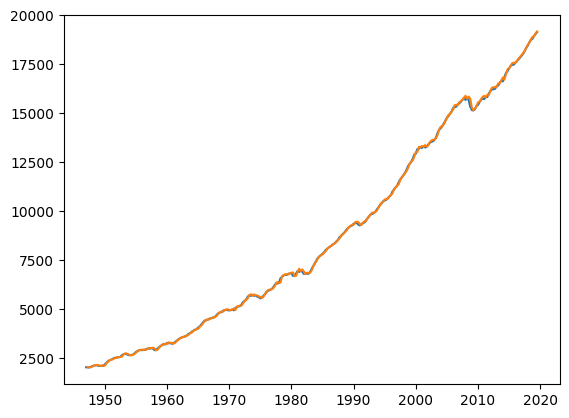

In [35]:
plt.plot(usgdp.index, usgdp.GDPC1) # nasz szereg
plt.plot(usgdp.index[1:],np.exp(arima.predict())[1:]) # pomijmy pierwsza bo jest bledna

### Dopasowanie modelu

Diagnostyka modelu sprowadza się m.in do:
- analizy reszt - jeśli dopadowany model poprawnie wyjaśnia dynamikę czasową analizowanego zjawiska, w szeregu reszt nie powinno być widać żadnych regularnych zachowań (trendu, sezonowości), ani istotnej korelacji czasowej (dla żadnego z opóźnień), stąd:
    - w praktyce możemy posługiwać się regułą, że reszty dopasowanego modelu powinny zachowywać się w przybliżeniu jak biały szum,
    - często weryfikujemy również dodatkowo, czy rozkład reszt można uznawać za rozkład normalny
    
W praktyce sprawdzamy najczęściej 
- wykres reszt - na wykresie nie powinno być widocznych regularnych wzorów ani niejednorodności wariancji, 
- test Durbina-Watsona - niezależność błędów obserwacji, dobrze dopasowany model zakłada, że otrzymywane reszty są niezależne od siebie, innymi słowy, rozkład ich jest losowy, przypadkowy, bez stale występującego wzorca. 
- ACF/PACF dla reszt - na wykresach nie powinno być widocznych istotnych korelacji (tzw. *graficzny test białoszumowości*),
- weryfikacja normalności rozkładu reszt - wykorzystujemy narzędzia graficzne (np. Q-Q plot lub histogram) oraz formalne testy statystyczne normalności (np. test Shapiro-Wilka).

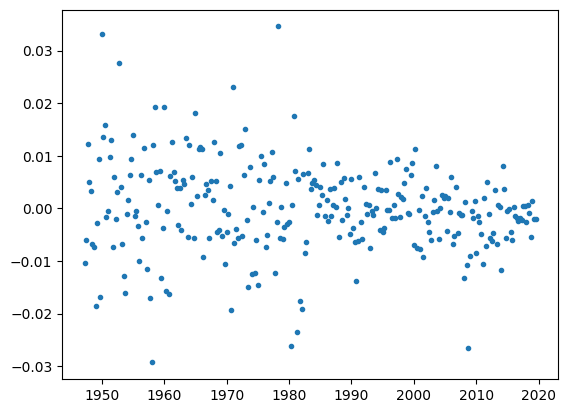

In [46]:
plt.plot(arima.resid[1:],'.')
# tu troche niepokjace 

### Test Durbina-Watsona

Statystyka DW mieści się w przedziale od 0 do 4:
- w przypadku DW > 2, zakłada się występowanie autokorelacji ujemnej, 
- w przypadku DW < 2 autokorelacji dodatniej,
- wartości zbliżone do 2 oznaczają brak występowania autokorelacji. 

In [39]:
sm.stats.durbin_watson(arima.resid[1:])

np.float64(1.9712376299888705)

### Wykres reszt za pomocą ACF i PACF

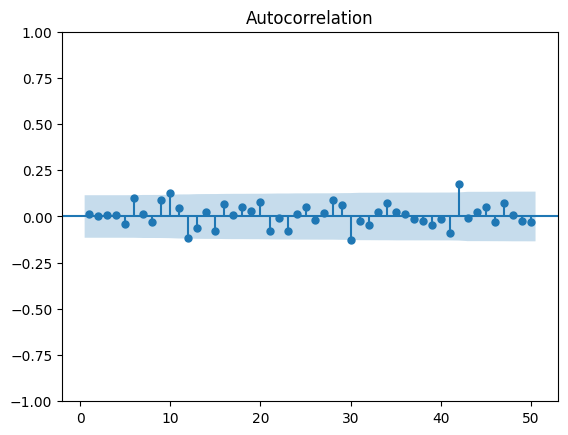

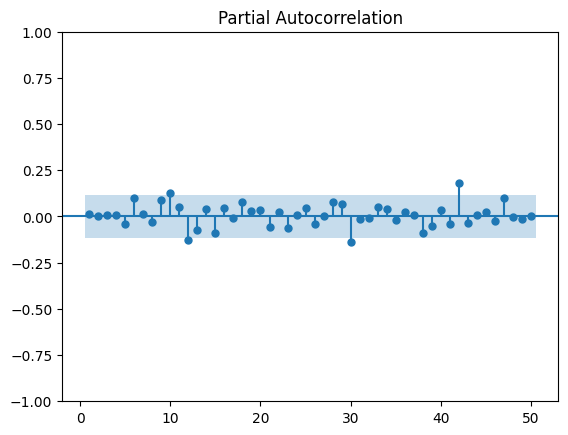

In [42]:
# wykres autokorelacji na rezyduach i sprawdzenie czy sie mieszcza w pasie
plot_acf(arima.resid[1:], lags=50, zero=False)
# ten model arima ktory dopasowalismy do zlogarytmizowanych danych jest ok,
# ale warto zrobic wiecej testow
plot_pacf(arima.resid[1:], lags=50, zero=False)
plt.show()

### Weryfikacja normalności rozkładu reszt

1. Test Shapiro-Wilka

    H0: Rozkład badanej cechy jest rozkładem normalnym.

    H1: Rozkład badanej cechy nie jest rozkładem normalnym.
    

2. Wykres $Q-Q$

In [ ]:
# nieskorelowane, to nie znaczy ze sa niezalezne
# nieskorelowane i niezalezne - silny bialy szum 
# nieskorelowane i zalezne - slaby bialy szum
# model Arge i Darge ? 


In [47]:
stats.shapiro(arima.resid[1:])

ShapiroResult(statistic=np.float64(0.9699421955981586), pvalue=np.float64(9.292301937512194e-06))

In [ ]:
# nie ma normalnosci! :( 

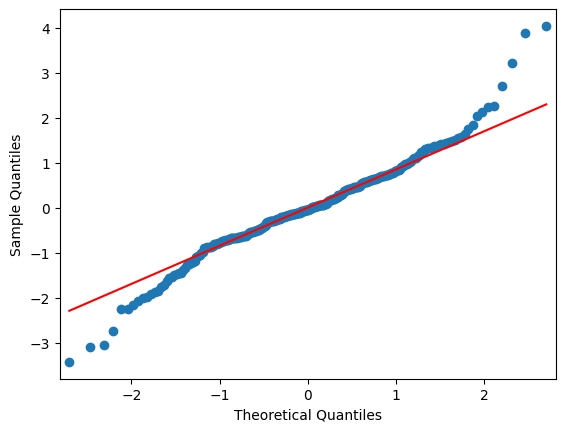

In [49]:
from statsmodels.graphics.api import qqplot
qqplot(arima.resid[1:],line='q', fit=True)
plt.show()
# nie ma normalnosci, na ogonach mocno to odstaje

In [ ]:
# widac ze model jest dobrze dopasowany do danych 
# sprawdzilismy potem i jest git
# cala zaleznosc zostala wyjasniona, zostal bialy szum
# 

### Analiza istotności współczynników w modelu

Jakość dopasowania modelu można niekiedy poprawić eliminując te współczynniki, które są statystycznie nieistotne, to znaczy nie odgrywają istotnej roli w wyjaśnianiu dynamiki czasowej modelowanego zjawiska.

Formalnie, sprawdzamy hipotezę zerową postaci 
$$H_0: \phi_i = 0,$$
kontra hipotezie alternatywnej 
$$H_1: \phi_i \neq 0$$.

Odrzucenie $H_0$ przemawia za pozostawieniem współczynnika $\phi_i$ w modelu.

### Dopasowanie (Predykcja) na podstawie modelu

In [50]:
usgdp

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2018-07-01,18732.720
2018-10-01,18783.548
2019-01-01,18927.281


In [ ]:
# predykcja statyczna vs predykcja dynamiczna

In [52]:
# predykcja dla szeregu zlogarytmizowanego
predict_logusgdp_dynamic = arima.predict(start='2010-01-01', dynamic=True)
predict_logusgdp_no_dynamic = arima.predict(start='2010-01-01', dynamic=False)

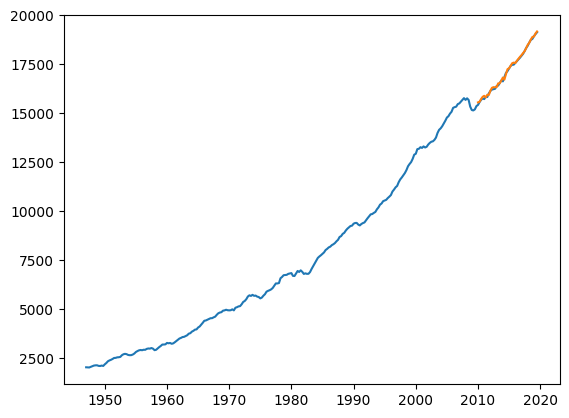

In [54]:
plt.plot(usgdp.index, usgdp.GDPC1)
plt.plot(usgdp.index[usgdp.index>='2010-01-01'],np.exp(predict_logusgdp_no_dynamic)) 

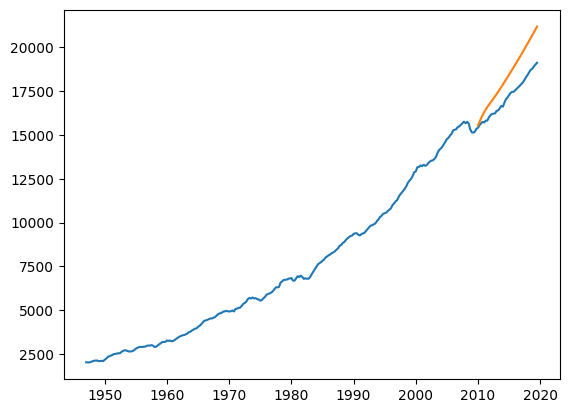

In [55]:
plt.plot(usgdp.index, usgdp.GDPC1) 
plt.plot(usgdp.index[usgdp.index>='2010-01-01'],np.exp(predict_logusgdp_dynamic)) 

In [ ]:
# Wniosek ?

## Zadanie 2
Dla danych

1. `southern`

2. `daily-total-female-births`

dopasuj odpowiedni model $\text{AR}(p)$ lub $\text{MA}(q)$ lub $\text{ARMA}(p, q)$ (rząd $p$ i $q$ wyznacz na podstawie wykresów ACF i PACF). Sprawdź dopasowanie modeli.

In [ ]:
# daily_biths = pd.read_csv('daily-total-female-births.csv', 
#                  parse_dates=['Date'], index_col='Date')

# daily_biths.head()

# Kryteria informacyjne oceniają jakość dopasowania modelu

Kryteria informacyjne oceniają jakość dopasowania modelu na podstawie danych historycznych, kontrolując jednocześnie stopień złożoności modelu. 

Zwiększając liczbę parametrów modelu (zwiększając złożoność modelu), możemy zazwyczaj otrzymać lepsze dopasowanie modelu do danych. Zbyt dobre dopasowanie modelu może jednak powodować problemy, a w szczególności może prowadzić do złych prognoz. Z tego powodu w postaci kryteriów wyboru modelu występuje składnik kary za wymiar modelu, w ogólności:

$$C(\text{model}) = -2 \ln(L) + \text{kara(liczba współczynników modelu)},$$
gdzie $L$ oznacza funkcję wiarogodności.

**AIC (Akaike Information Criterium)**
$$AIC(p, q) = -2 \ln(L) + 2\cdot(p+q+1)$$

**BIC (Bayesian Information Criterium)**
$$BIC(p, q) = -2 \ln(L) + (p+q+1)\cdot\ln n$$

### Kryteria oceniające dokładność prognoz 

- MSE - Mean Squared Error
- MAE - Median Absolute Error

Należy jednak pamiętać, że w odróżnieniu od kryteriów infromacyjnych, kryteria oparte na błędach predykcji nie mają wbudowanego mechanizmu, który "karałby" za złożoność modelu.

## Zadanie 3

Napisz funkcję, która dla dowolnego szeregu czasowego i modelu `ARMA` sprawdzi jego dopasowanie oraz jakość predykcji na podstawie MSE i MAE.
Zawrzyj informację o wartości oszacowanych współczynników modelu, wartości AIC i BIC, wartości statystyki Durbina-Watsona oraz ocenę normalności reszt.

Następnie sprawdź dopasowanie dla kilku wybranych modeli ARMA.

In [ ]:
# def mse(y, yhat):
#     return np.mean((y - yhat) ** 2)

# def mae(y, yhat):
#     return np.median(np.abs(y - yhat))

In [ ]:
# def fit_ARMA(ts, p, q, pred_start, pred_end):
#     arma = ARIMA(ts, order=(p, 0, q)).fit()
    
#     print('AR params %s' % arma.arparams)
#     print('MA params %s' % arma.maparams)
    
#     print('AIC: %.2f, \nBIC: %.2f' % (arma.aic, arma.bic))
    
#     dw_test = sm.stats.durbin_watson(arma.resid)
#     print("Statystyka Durbina-Watsona {}".format(dw_test))
    
#     normal_test = stats.shapiro(arma.resid)
#     print("Pvalue testu Shapiro-Wilka: {}".format(normal_test[1]))
    
#     pred = arma.predict(start=pred_start, end=pred_end,dynamic = True)
        
#     mse_val = mse(ts.values, pred.values)
#     mae_val = mae(ts.values, pred.values)
#     print('MSE: {}'.format(mse_val))
#     print('MAE: {}'.format(mae_val))
    
#     plt.plot(ts)
#     plt.plot(pred, 'g--')
#     plt.show()

# Optymalna wartość $p$ na podstawie kryterium oceniającego dobroć dopasowania modelu (AIC lub BIC)

## Zadanie 4
Napisz funkcję, która dla danego szeregu czasowego wyznaczy najlepszy rząd $p$ modelu $\text{AR}(p)$ na podstawie kryterium AIC i BIC.

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# def find_the_best_parametr_ar(ts, max_p = 10):
#     aic = np.zeros(max_p)
#     bic = np.zeros(max_p)
#     for i in range(1, max_p + 1):
#         ar = ARIMA(ts, (i, 0, 0)).fit()
#         aic[i-1] = ar.aic
#         bic[i-1] = ar.bic
        
#     plt.plot(range(1, max_p + 1), aic, 'r.-', label="AIC")
#     plt.plot(range(1, max_p + 1), bic, 'g.-', label="BIC")
#     plt.legend()
#     plt.show()
        
#     print("Najlepszy rząd p: {} dla kryterium AIC (AIC={})".format(np.argmin(aic) + 1, np.min(aic)))
#     print("Najlepszy rząd p: {} dla kryterium BIC (BIC={})".format(np.argmin(bic) + 1, np.min(bic)))

## Zadanie 5

Napisz funkcję, która dla danego szeregu czasowego wyznaczy najlepszy rząd $p$ i $q$ modelu $\text{ARMA}(p)$ na podstawie kryterium AIC i BIC.

In [ ]:
# def find_the_best_arma(ts, max_p = 10, max_q=10):
#     aic = np.zeros((max_p, max_q))
#     bic = np.zeros((max_p, max_q))
    
#     for i in range(max_p):
#         for j in range(max_q):
#             arma = ARIMA(ts, order=(i + 1, 0, j + 1)).fit()
#             aic[i, j] = arma.aic
#             bic[i, j] = arma.bic
#             print('ARMA(%d, %d): AIC=%f, BIC=%f' % (i+1, j+1, arma.aic, arma.bic))
            
#     print("-" * 30)
#     min_aic = np.min(aic)
#     min_arg_aic = np.argwhere(aic == min_aic)[0]
#     print("MINIMUM AIC=%f dla p=%d, q=%d" % (min_aic, min_arg_aic[0] + 1, min_arg_aic[1] + 1))
#     min_bic = np.min(bic)
#     min_arg_bic = np.argwhere(bic == min_bic)[0]
#     print("MINIMUM BIC=%f dla p=%d, q=%d" % (min_bic, min_arg_bic[0] + 1, min_arg_bic[1] + 1))